In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
from data import load_data

(x_train, y_train), (x_test, y_test) = load_data()

multi label

In [3]:
y_train_large = (y_train >= 5)
y_train_odd = (y_train % 2 == 1)
y_multi_label = np.c_[y_train_large, y_train_odd]
print("y_multi_label.shape = {}".format(y_multi_label.shape))

y_multi_label.shape = (60000, 2)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_multi_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
test_sample = x_test[:5]
test_number = y_test[:5]
print("test_number = {}".format(test_number))

knn_model.predict(test_sample)

test_number = [7 2 1 0 4]


array([[ True,  True],
       [False, False],
       [False,  True],
       [False, False],
       [False, False]])

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_model, x_train, y_multi_label, cv=3, n_jobs=-1)
f1_score(y_multi_label, y_train_knn_pred, average="macro")

0.9817475061789299

Multioutput classification

In [7]:
x_train_noise = x_train + np.random.randint(0, 100, (len(x_train), 784))
x_test_noise = x_test + np.random.randint(0, 100, (len(x_test), 784))

In [8]:
from plot import plot_digit

In [9]:
# plot_digit(x_test[0])

In [10]:
# plot_digit(x_test_mod[0])

In [11]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_noise, x_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

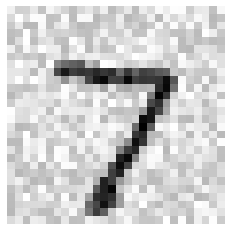

In [12]:
plot_digit(x_test_noise[0])

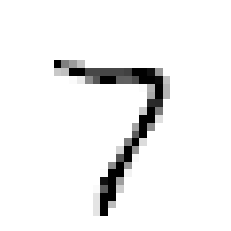

In [13]:
clean_digit = knn_clf.predict([x_test_noise[0]])
plot_digit(clean_digit)